In [18]:
import pandas as pd
import numpy as np


In [34]:
def map_name(name):
    if name in ['BTC', 'ETH', 'EOS']:
        return name
    
    return 'other'

In [56]:
ac_df = pd.read_csv('all_coins.csv')
ac_df.dropna(inplace=True)
ac_df.drop(ac_df[ac_df.circulating_supply < 0].index, inplace=True)
display(ac_df.describe())

acs_df = ac_df[['price_btc', 'circulating_supply']].apply(np.log)
# To limit number of labels
#acs_df['symbol'] = ac_df['symbol'].apply(map_name)

# Full labels
acs_df['symbol'] = ac_df['symbol']
display(acs_df.head())


,price_btc,circulating_supply
count,1.315000e+03,1.315000e+03
mean,9.141357e-02,9.354791e+09
std,2.688109e+00,1.977409e+11
min,6.958140e-11,7.826400e-02
25%,1.556610e-06,8.538520e+06
50%,1.084000e-05,4.095120e+07
75%,6.241010e-05,2.190579e+08
max,9.631170e+01,7.065566e+12


,price_btc,circulating_supply,symbol
0,0.000000,16.649125,BTC
1,-2.596330,18.412025,ETH
2,-9.294972,24.390569,XRP
3,-1.887216,16.654688,BCH
4,-6.220360,20.530821,EOS


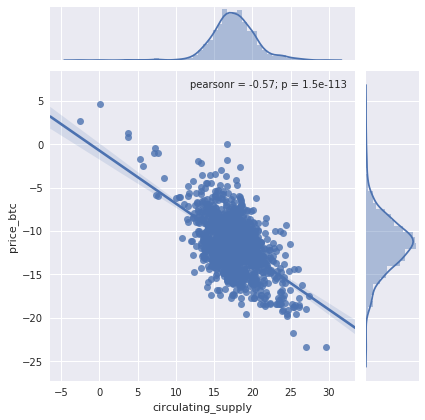

In [57]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

acs_g = sns.jointplot(x='circulating_supply', y='price_btc', data=acs_df, kind="reg")

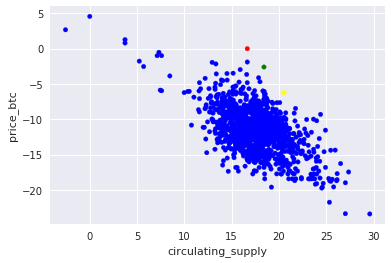

In [60]:
def map_colors(name):
    if name=='BTC':
        return 'red'
    elif name=='ETH':
        return 'green'
    elif name=='EOS':
        return 'yellow'
    elif name=='MYST':
        return 'pink'
    
    return 'blue'

colors = acs_df['symbol'].apply(map_colors)

acs_df.plot.scatter(x='circulating_supply', y='price_btc', c=colors)

In [63]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, WheelZoomTool, PanTool

In [51]:
output_notebook()

Loading BokehJS ...

In [64]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("symbol", "@symbol"),
])

p = figure(tools=[hover, WheelZoomTool(), PanTool()])
p.scatter(x='circulating_supply', y='price_btc', source=acs_df)

show(p)

In [65]:
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("symbol", "@symbol"),
])

p = figure(tools=[hover, WheelZoomTool(), PanTool()], toolbar_location="right")
p.scatter(x='circulating_supply', y='price_btc', source=ac_df)

show(p)